In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [28]:
df = pd.read_csv('sensors_val.csv')

In [29]:
data = df[['Temp0', 'Temp1', 'Pres1']]

In [30]:
data

,Temp0,Temp1,Pres1
0,75.000000,75.343750,342.333333
1,75.350000,75.616667,297.133333
2,75.866667,76.368750,296.333333
3,76.700000,76.981250,269.466667
4,76.700000,76.981250,291.900000
...,...,...,...
47066,88.700000,88.981250,238.133333
47067,88.783333,89.038542,239.333333
47068,88.450000,88.790625,252.733333
47069,88.133333,88.570833,232.100000


In [31]:
data.describe

<bound method NDFrame.describe of            Temp0      Temp1       Pres1
0      75.000000  75.343750  342.333333
1      75.350000  75.616667  297.133333
2      75.866667  76.368750  296.333333
3      76.700000  76.981250  269.466667
4      76.700000  76.981250  291.900000
...          ...        ...         ...
47066  88.700000  88.981250  238.133333
47067  88.783333  89.038542  239.333333
47068  88.450000  88.790625  252.733333
47069  88.133333  88.570833  232.100000
47070  89.000000  89.237500  256.500000

[47071 rows x 3 columns]>

In [32]:
data.isnull().any()

Temp0    False
Temp1    False
Pres1    False
dtype: bool

In [33]:
data.isnull().sum()/ data.shape[0]

Temp0    0.0
Temp1    0.0
Pres1    0.0
dtype: float64

In [34]:
data.describe()

,Temp0,Temp1,Pres1
count,47071.000000,47071.000000,47071.000000
mean,81.273901,81.635643,275.688766
std,3.352182,3.347668,36.315515
min,75.000000,75.000000,136.666667
25%,79.000000,79.472917,251.966667
50%,80.683333,80.933333,270.333333
75%,82.700000,82.985417,291.633333
max,127.000000,137.012500,594.433333


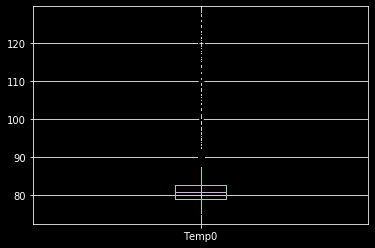

In [35]:
data.boxplot('Temp0')

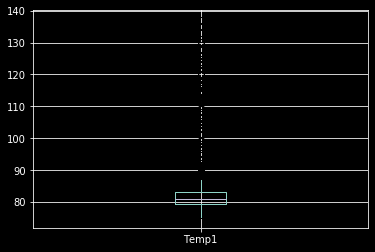

In [36]:
data.boxplot('Temp1')

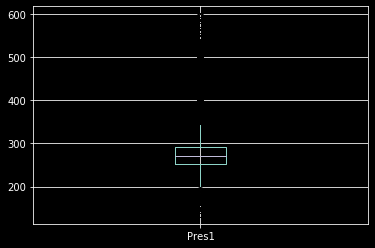

In [37]:
data.boxplot('Pres1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23696bf10>,
      dtype=object)

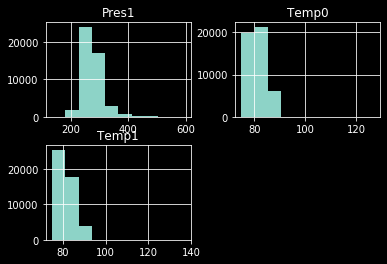

In [38]:
data[['Temp0', 'Temp1', 'Pres1']].hist()

In [39]:
import seaborn as sns 

/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
corrdata = data

In [45]:
corr = corrdata.corr()

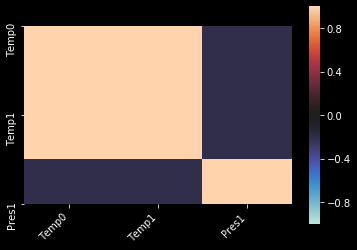

In [51]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [53]:
X1 = data.Temp1.values.reshape(-1,1)
y1 = data.Pres1.values.reshape(-1,1)

In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [62]:
reg = LinearRegression().fit(X_train1, y_train1)
print(reg.score(X_train1, y_train1))
reg.coef_
y_hat1 = reg.predict(X_train1)

0.03945291795245498


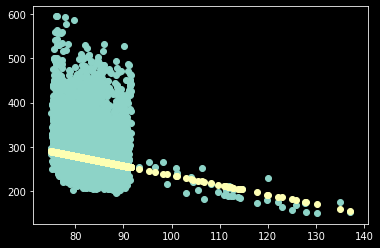

In [59]:
plt.scatter(X_train1,y_train1)
plt.scatter(X_train1,y_hat1)
plt.show()

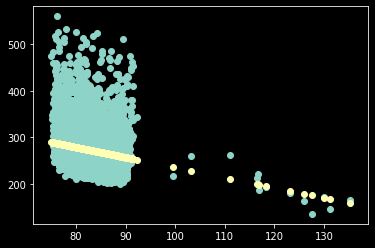

In [60]:
y_hat_test1 = reg.predict(X_test1)
plt.scatter(X_test1, y_test1)
plt.scatter(X_test1, y_hat_test1)
plt.show()

In [61]:
mae = mean_absolute_error(y_hat_test1,y_test1)
rmse = math.sqrt(mean_squared_error(y_hat_test1,y_test1))
print('Root Mean Squared Error = ',rmse)
print('Mean Absolute Error = ',mae)

Root Mean Squared Error =  35.10304016450607
Mean Absolute Error =  25.256960652817448


In [63]:
import statsmodels.api as sm

In [64]:
X1b = data[['Temp1']]
X1b = sm.add_constant(X1b)
y1b = data.Pres1.values

X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.3, random_state=0)

reg_sm1b = sm.OLS(y_train1b, X_train1b).fit()
reg_sm1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1353.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          2.32e-290
Time:                        01:28:06   Log-Likelihood:            -1.6461e+05
No. Observations:               32949   AIC:                         3.292e+05
Df Residuals:                   32947   BIC:                         3.292e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        452.3663      4.809     94.069      0.000     442.941     461.792
Temp1         -2.1649      0.059    -36.786      0.000      -2.280      -2.050
==============================================================================
Omnibus:                    14165.029   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94854.265
Skew:                           1.946   Prob(JB):                         0.00
Kurtosis:                      10.344   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
### 452,4 - 2.16 * temp1 

In [66]:
# multiple linear regression 

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
X2 = data[['Temp0','Temp1']]
X2 = sm.add_constant(X2)
y2 = data.Pres1.values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)

reg_sm2 = sm.OLS(y_train2, X_train2).fit()
reg_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     684.5
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          5.44e-292
Time:                        01:38:24   Log-Likelihood:            -1.6460e+05
No. Observations:               32949   AIC:                         3.292e+05
Df Residuals:                   32946   BIC:                         3.292e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.1730      4.830     94.028      0.000     444.706     463.640
Temp0          4.5052      1.157      3.895      0.000       2.238       6.772
Temp1         -6.6723      1.159     -5.759      0.000      -8.943      -4.401
==============================================================================
Omnibus:                    14158.839   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94761.458
Skew:                           1.946   Prob(JB):                         0.00
Kurtosis:                      10.340   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)

const    600.220321
Temp0    382.893311
Temp1    382.893311
dtype: float64

In [79]:
y_hat2 = reg_sm2.predict(X_test2)

rmse2 = math.sqrt(mean_squared_error(y_hat2,y_test2))
rmse2

35.09259195471799

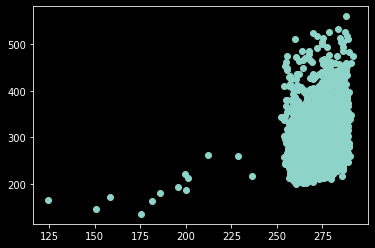

In [80]:
plt.scatter(y_hat2,y_test2)